## Constant from IV-characteristics : <font color = 'sky blue'> $n_e, T_e, T_-, I_{sat+}$ </font>
<font size="2">
    [1] <a href="https://sci-hub.se/https://aip.scitation.org/doi/10.1063/1.4802252"> [2013] Langmuir probe analysis of highly electronegative plasmas</a> <br>
    [2] <a href="https://sci-hub.se/https://doi.org/10.1063/1.4903328"> [2014] Langmuir probe analysis in electronegative plasmas</a> <br>
    [3] <a href="https://sci-hub.se/https://doi.org/10.1063/1.874162"> [2000] How big is a small Langmuir probe?</a> <br>
    [4] <a href="https://sci-hub.se/10.1088/0022-3727/43/10/105204"> [2010] The plasma sheath around large discs and ion collection by planar Langmuir probes</a> <br>

In [32]:
import numpy as np
import xml.etree.ElementTree as ET
from scipy.optimize import fsolve
from scipy.integrate import simpson
from scipy.integrate import odeint
from const import *
import matplotlib.pyplot as plt
import ldf
import plotting

import importlib
importlib.reload(plotting)
importlib.reload(ldf)

<module 'ldf' from 'c:\\Users\\GUNU\\OneDrive\\바탕 화면\\negative-ion\\ldf.py'>

In [27]:
class Iterative_method():
    def __init__(self, ne, Te, V_sat, I_sat, V_p):
        Tm = 0.1
        self.ne = ne
        self.Te = Te
        self.V_sat = V_sat
        self.I_sat = I_sat
        self.gamma = self.Te/Tm
        self.V_p = V_p
        self.De = np.sqrt(epsilon_0*kB*Te/(e**2*ne)) #electron debye length
        #print("ne : {:.2e}, Te : {}, V_sat : {}, I_sat : {:.2e}".format(ne,Te,V_sat,I_sat))
        
    def alpha_convert(self,a_0):
        def eqn21(a_s):
            return a_0 - a_s*np.exp(-1/2*(1+a_s)/(1+self.gamma*a_s)*(1-self.gamma))
        ans_arr = np.round(fsolve(eqn21,np.logspace(-2,2,5)),4)
        ans_arr = np.unique(ans_arr)
        a_s = min(ans_arr)
        print("a_0: {:.4f}\t a_s: {}\t gamma: {:.4f}\t sol_number: {}".format(a_0, a_s, self.gamma, len(ans_arr)))
        return a_s
    
    def modified_Bohm(self,a_s):
        uB = np.sqrt(e*self.Te/Mp)*np.sqrt((1+a_s)/(1+self.gamma*a_s))
        return uB
    
    def r_sh_calculation(self, J): 
            r_sh = np.sqrt(4/9*epsilon_0*np.sqrt(2*e/Mp)*(self.V_sat - self.V_p)**1.5/J)
            #r_sh = rp
            return r_sh
    
    def cal_rsh(self, V, J, a_s, uB):
        # R = 20*rp
        # def func(y, r):
        #     u, E = y
        #     dydr = [e*E/Mp/u, R*J/(epsilon_0*r*u)-E/r]
        #     return dydr
        # y0 = [np.sqrt(2*e*(self.V_p+self.V_sat)/Mp + uB**2), 0]
        # print('y0: {}\tV_p-V_sat:{}\tuB:{}\t'.format(y0, self.V_p+self.V_sat, uB))
        
        # r1 = np.linspace(rp,R,100)
        # sol = odeint(func, y0, r1)
        # print('Voltage difference: ' + str(simpson(sol[:, 1], r1)))
        # plt.plot(r1, sol[:, 0], r1, sol[:, 1] )
        # plt.show()
        
        return rp
        #return simpson(sol[:, 1], r1) #V

    def iteration(self):
        #print("ne : {:.2e}, Te : {}, V_sat : {}, I_sat : {:.2e}".format(self.ne,self.Te,self.V_sat,self.I_sat))
        count = 0
        a_0 = 3
        r_sh_0 = rp
        S_eff = 2*(np.pi)*r_sh_0*lp
        
        while True:
            MAX_COUNT = 100
            count += 1
            a_s = self.alpha_convert(a_0)
            uB = self.modified_Bohm(a_s) # uB_k
            n_p = self.I_sat/(hr*S_eff*e*uB) # np_k , S_k-1
            comp = a_0 # for loop condition
            a_0 = n_p/self.ne-1 # a_0_k
            J = hr*e*n_p*uB # J_k
            #r_sh = self.r_sh_calculation(J) #r_sh_k
            #r_sh = self.cal_rsh(V, J, a_s, uB)
            r_sh = self.cal_rsh(self.V_sat, J, a_s, uB)
            S_eff = 2*np.pi*r_sh*lp
            
            #print(count, a_0)
            
            if abs(comp - a_0) < 0.001*a_0:
                return a_0
                break
            if count == MAX_COUNT:
                print('-----------No Convergence!---------------------')
                break
        print('--------------------------------------------------')

./211221(SF6)/SF6/Radial Scan_15sccm/0.ldf
no eedf datas


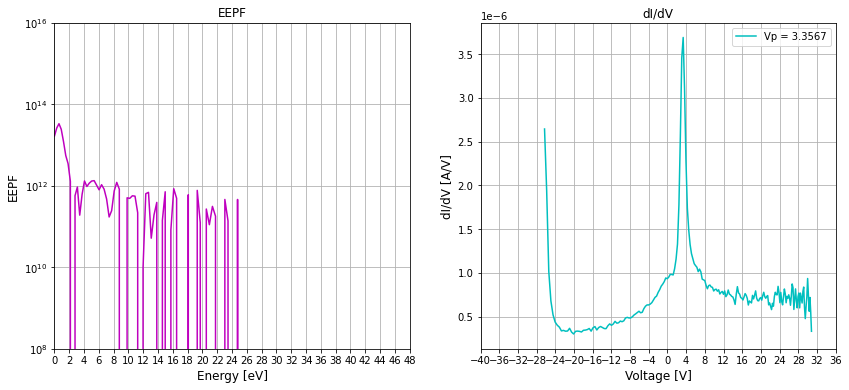

Enter limited energy
ne: 3.389e+13 [m-3]	 Te: 0.951 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4928	 gamma: 9.5098	 sol_number: 1
a_0: 4988.5609	 a_s: 3188.6554	 gamma: 9.5098	 sol_number: 1
a_0: 6230.0735	 a_s: 3982.3217	 gamma: 9.5098	 sol_number: 1
Vp: 3.35671, Vsat: 26.3163, Isat: 1.92473e-05


./211221(SF6)/SF6/Radial Scan_15sccm/7.ldf
no eedf datas


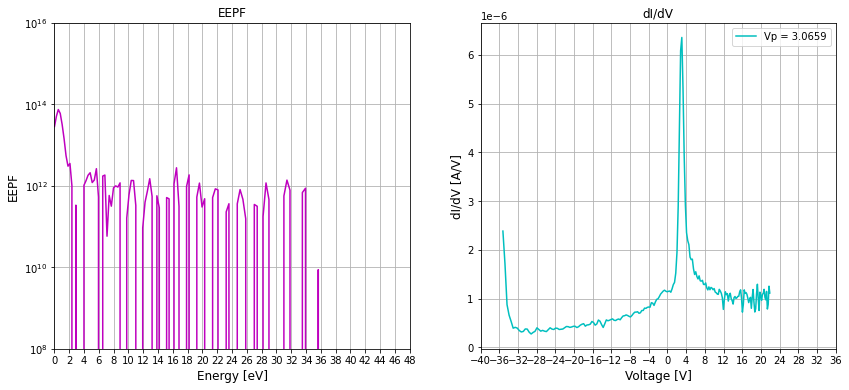

Enter limited energy
ne: 6.553e+13 [m-3]	 Te: 0.840 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.5253	 gamma: 8.3990	 sol_number: 1
a_0: 3666.0508	 a_s: 2359.5748	 gamma: 8.3990	 sol_number: 1
a_0: 4542.5329	 a_s: 2923.7965	 gamma: 8.3990	 sol_number: 1
Vp: 3.06594, Vsat: 35.2269, Isat: 2.71354e-05


./211221(SF6)/SF6/Radial Scan_15sccm/14.ldf
no eedf datas


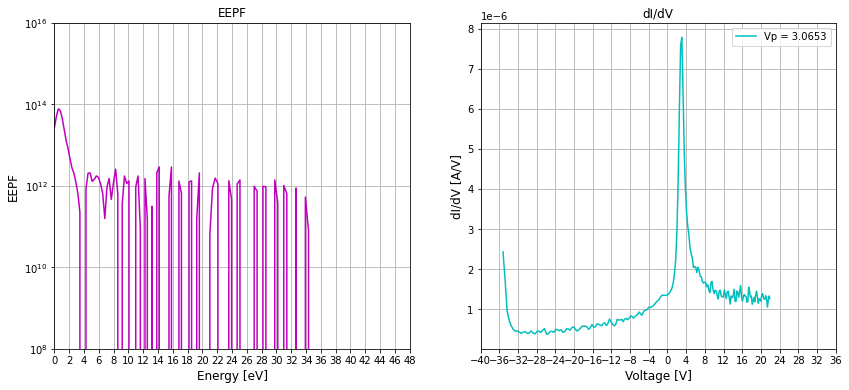

Enter limited energy
ne: 7.824e+13 [m-3]	 Te: 0.961 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4903	 gamma: 9.6065	 sol_number: 1
a_0: 3640.4408	 a_s: 2325.605	 gamma: 9.6065	 sol_number: 1
a_0: 4549.0624	 a_s: 2906.1555	 gamma: 9.6065	 sol_number: 1
Vp: 3.06526, Vsat: 35.2108, Isat: 3.24462e-05


./211221(SF6)/SF6/Radial Scan_15sccm/21.ldf
no eedf datas


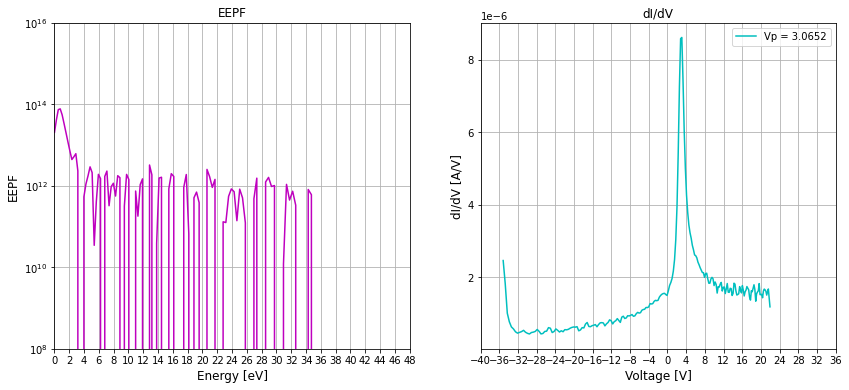

Enter limited energy
ne: 8.251e+13 [m-3]	 Te: 1.063 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4662	 gamma: 10.6265	 sol_number: 1
a_0: 3970.5453	 a_s: 2523.8687	 gamma: 10.6265	 sol_number: 1
a_0: 4991.1901	 a_s: 3172.7449	 gamma: 10.6265	 sol_number: 1
Vp: 3.06519, Vsat: 35.1699, Isat: 3.75418e-05


./211221(SF6)/SF6/Radial Scan_15sccm/28.ldf
no eedf datas


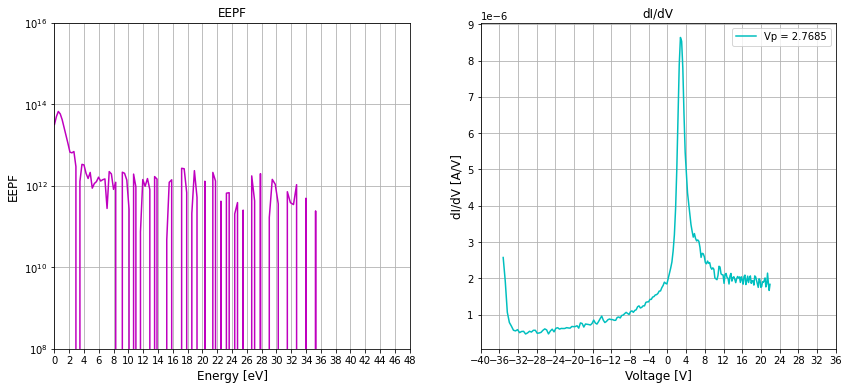

Enter limited energy
ne: 7.340e+13 [m-3]	 Te: 0.952 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4925	 gamma: 9.5192	 sol_number: 1
a_0: 5037.5454	 a_s: 3219.8024	 gamma: 9.5192	 sol_number: 1
a_0: 6291.6717	 a_s: 4021.4907	 gamma: 9.5192	 sol_number: 1
Vp: 2.76851, Vsat: 35.168, Isat: 4.20929e-05


./211221(SF6)/SF6/Radial Scan_15sccm/35.ldf


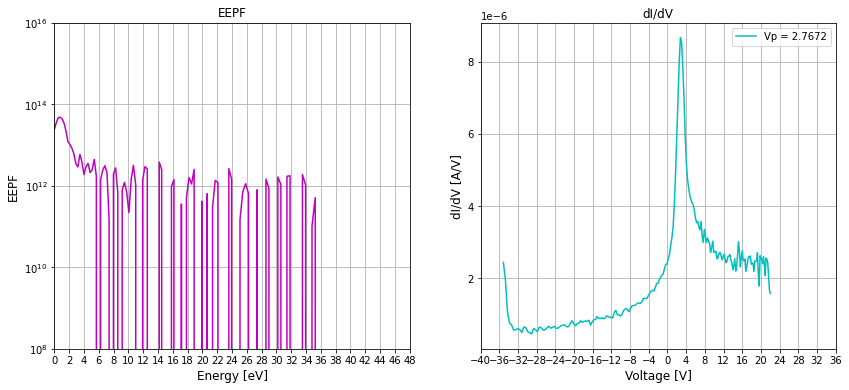

Enter limited energy
ne: 6.485e+13 [m-3]	 Te: 1.079 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4628	 gamma: 10.7878	 sol_number: 1
a_0: 6142.4045	 a_s: 3901.8837	 gamma: 10.7878	 sol_number: 1
a_0: 7728.2716	 a_s: 4909.3917	 gamma: 10.7878	 sol_number: 1
Vp: 2.76716, Vsat: 35.1215, Isat: 4.56797e-05


./211221(SF6)/SF6/Radial Scan_15sccm/42.ldf


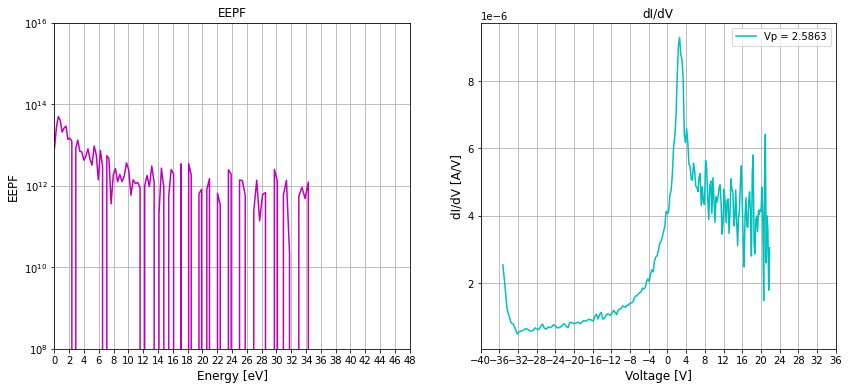

Enter limited energy
ne: 5.347e+13 [m-3]	 Te: 1.111 [eV] 	 V_lim: 2.0
a_0: 3.0000	 a_s: 1.4563	 gamma: 11.1076	 sol_number: 1
a_0: 7932.6105	 a_s: 5032.4864	 gamma: 11.1076	 sol_number: 1
a_0: 9997.1911	 a_s: 6342.374	 gamma: 11.1076	 sol_number: 1
Vp: 2.58629, Vsat: 35.2402, Isat: 4.87129e-05




In [28]:
xs, nes, nms, alphas, Vps, Tes, Nis = [], [], [], [], [], [], []

#workDir = './211216(SF6)/bias (float) 0mm B-field/'
workDir = './211221(SF6)/SF6/Radial Scan_15sccm/'
parser = ldf.parser(workDir)
ldf_list = parser.ldf_paths()

for file in ldf_list:

    # Check file name
    print(file)

    # Parsing IV curve from ldf file
    IV, imported_eedf, result = parser.pull_attr(file, need_return=True)
    x = float(file.split('/')[-1][:-4])

    # Calculation x, Vsat, Isat, Vp, eepf, eedf from IV curve
    processor = ldf.processor(IV)
    Vsat, Isat = processor.cal_sat()
    Vp = processor.cal_Vp()
    energy, eepf, eedf = processor.cal_eepf()

    # Plot EEPF and dIdV to determine energy range 
    plotting.plot_check(energy, eepf, processor.V, processor.dIdV, Vp)

    # Enter energy range for EEDF integration to get ne & Te
    print("Enter limited energy")
    V_lim = input()
    V_lim = np.float32(V_lim)

    # Calculation ne & Te from EEDF
    ne = processor.cal_ne(V_lim)
    Te = processor.cal_Te(ne, V_lim)
    print('ne: {:.3e} [m-3]\t Te: {:.3f} [eV] \t V_lim: {}'.format(ne, Te, V_lim))
    
    # Start Iterative method
    exp = Iterative_method(ne,Te,Vsat,Isat,Vp)
    alpha = exp.iteration()
    nm = ne*alpha
    print("Vp: {}, Vsat: {}, Isat: {}\n\n".format(Vp, Vsat, Isat))
    
    Vps.append(Vp)
    alphas.append(alpha)
    nes.append(ne)
    nms.append(nm)
    xs.append(x)
    Tes.append(Te)

Vps = np.array(Vps)
alphas = np.array(alphas)
nes = np.array(nes)
nms = np.array(nms)
xs = np.array(xs)
Tes = np.array(Tes)

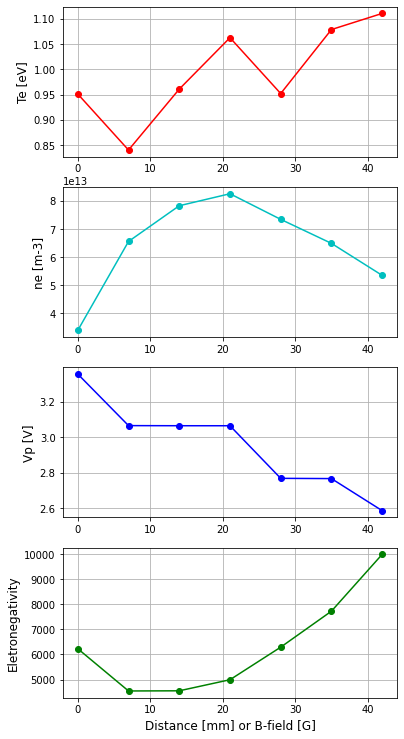

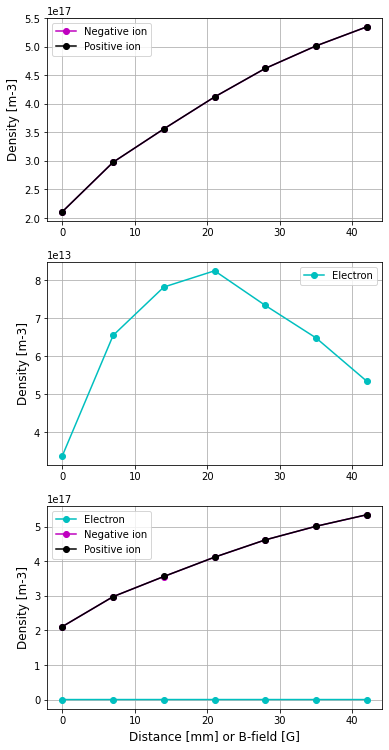

In [33]:
plotting.plot_default(xs, Tes, Vps, alphas, nes)
plotting.plot_density(xs, nes, nms, nes+nms)

The algorithm converged to the desired accuracy.


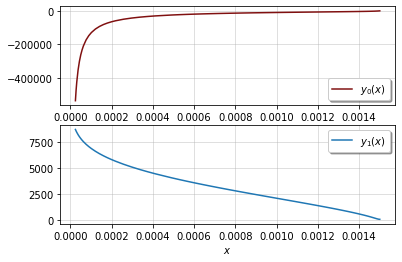

In [74]:
from scipy.integrate import solve_bvp
rp= 25e-6
J = 10
V = 50
uB = 100
R= 50e-5
def fun(r, y, r_sh):
    return np.vstack((r_sh*J/(r*epsilon_0*y[1])-y[0]/r, e*y[0]/(Mp*y[1])))

def bc(ya,yb,p):
    return np.array([yb[0],ya[1]-np.sqrt(2*e*V/Mp),yb[1]-uB])
# a=시작
# b=끝
# 0=E
# 1=u
n = 20
r = np.linspace(rp, 3*R, n)
y = np.array([np.linspace(V, 0, n)/(R-rp), np.linspace(np.sqrt(2*e*V/Mp), uB, n)])

sol = solve_bvp(fun, bc, r, y,p=(10*rp,))

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)

plt.subplot(2, 1, 1)
plt.plot(sol.x, sol.y[0], color='#801010', label='$y_0(x)$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)
plt.subplot(2, 1, 2)
plt.plot(sol.x, sol.y[1], '-', color='C0', label='$y_1(x)$')
plt.xlabel('$x$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)
plt.show()